In [17]:
import pandas as pd
import numpy as np
%pip install sklearn

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for sklearn: filename=sklearn-0.0.post7-py3-none-any.whl size=2952 sha256=69fa322c60789301e2900429ebcf4927b68f22393b8dca07ee882d563e5b2349
  Stored in directory: c:\users\kmudhanyana\appdata\local\pip\cache\wheels\f3\6d\ba\d999da6dff3d5cc6735e9855579fa236bf7c5bdbb210a873b8
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [18]:
data = pd.read_csv("data/Task_3_and_4_Loan_Data.csv")

data.head()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10000 non-null  int64  
 1   credit_lines_outstanding  10000 non-null  int64  
 2   loan_amt_outstanding      10000 non-null  float64
 3   total_debt_outstanding    10000 non-null  float64
 4   income                    10000 non-null  float64
 5   years_employed            10000 non-null  int64  
 6   fico_score                10000 non-null  int64  
 7   default                   10000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 625.1 KB


In [20]:
data.describe()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.974577e+06,1.461200,4159.677034,8718.916797,70039.901401,4.552800,637.557700,0.185100
std,2.293890e+06,1.743846,1421.399078,6627.164762,20072.214143,1.566862,60.657906,0.388398
min,1.000324e+06,0.000000,46.783973,31.652732,1000.000000,0.000000,408.000000,0.000000
25%,2.977661e+06,0.000000,3154.235371,4199.836020,56539.867903,3.000000,597.000000,0.000000
50%,4.989502e+06,1.000000,4052.377228,6732.407217,70085.826330,5.000000,638.000000,0.000000
75%,6.967210e+06,2.000000,5052.898103,11272.263740,83429.166133,6.000000,679.000000,0.000000
max,8.999789e+06,5.000000,10750.677810,43688.784100,148412.180500,10.000000,850.000000,1.000000


In [21]:
from sklearn.feature_selection import mutual_info_classif

X = data.drop('default', axis=1)
y = data['default']

mutual_info = mutual_info_classif(X, y)
mutual_info = pd.Series(mutual_info, name = "mutual_info", index = X.columns)


In [22]:
mutual_info

customer_id                 0.000000
credit_lines_outstanding    0.420360
loan_amt_outstanding        0.005058
total_debt_outstanding      0.304367
income                      0.003821
years_employed              0.046388
fico_score                  0.058443
Name: mutual_info, dtype: float64

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [24]:
def plot_mutual_info(scores):
    scores = scores.sort_values(ascending = True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

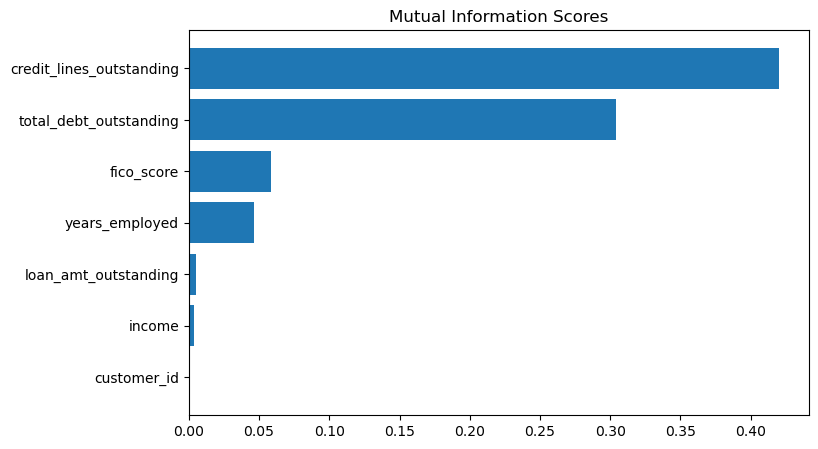

In [25]:
plt.figure(dpi = 100, figsize = (8, 5))
plot_mutual_info(mutual_info)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model on the test set
score = model.score(X_test, y_test)
print(f"Accuracy: {score:.2f}")




Accuracy: 0.98


In [27]:
from sklearn.tree import DecisionTreeClassifier

# Train a decision tree model
dc_model = DecisionTreeClassifier()
dc_model.fit(X_train, y_train)

# Evaluate the model on the test set
score = dc_model.score(X_test, y_test)
print(f"Accuracy: {score:.2f}")


Accuracy: 1.00


In [28]:
# Get the features and labels
X = data[["credit_lines_outstanding", "loan_amt_outstanding","total_debt_outstanding","income","years_employed","fico_score"]]
y = data["default"]


In [29]:
import sklearn
# Perform 5-fold cross-validation
scores = sklearn.model_selection.cross_val_score(dc_model, X, y, cv=5)

# Print the scores for each fold
print(scores)

[0.996 0.998 0.995 0.996 0.994]


In [30]:
X_predict = pd.DataFrame(np.array([5,1958.928726,8228.75252,26648.43525,2,572]).reshape(1,-1), 
                         columns=["credit_lines_outstanding", "loan_amt_outstanding","total_debt_outstanding","income","years_employed","fico_score"])

pred = dc_model.predict(X_predict)
print(pred)

c:\Users\kmudhanyana\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- customer_id

  warnings.warn(message, FutureWarning)


ValueError: X has 6 features, but DecisionTreeClassifier is expecting 7 features as input.

In [31]:
import pickle

# save
with open('dc_model.pkl','wb') as f:
    pickle.dump(dc_model,f)

# load
with open('dc_model.pkl', 'rb') as f:
    loaded_dc_model = pickle.load(f)

loaded_dc_model.predict(X_predict)

c:\Users\kmudhanyana\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- customer_id

  warnings.warn(message, FutureWarning)


ValueError: X has 6 features, but DecisionTreeClassifier is expecting 7 features as input.

In [32]:
# pickle file for logistic regression
import pickle as pickle
# save
with open('model.pkl','wb') as f:
    pickle.dump(model,f)

# load
with open('model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

loaded_model.predict(X_predict)

c:\Users\kmudhanyana\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- customer_id

  warnings.warn(message, FutureWarning)


ValueError: X has 6 features, but LogisticRegression is expecting 7 features as input.